# АДБиМ, 

# Методы Моделирования Пространственной структуры Протеинов

# Семинар 1: BioPython tutorial

## 1. Installation / import

In [3]:
! pip3 install biopython

## 2. Модуль PDB (Работа с файлами из PDB - Protein Data Bank)

In [4]:
import Bio.PDB as pdb

### 2.1. Открытие файла PDB, структура

In [7]:
# Любой файл PDB может быть получен из базы с помощью указания его ID.
# Для этого используется объект класса PDBList:

from os.path import exists
pdb_list = pdb.PDBList()
for pdb_id in ["1FSD"]:
    print("Fetching {}...".format(pdb_id))
    
    # Функция возвращает путь к скачанному файлу.
    path = pdb_list.retrieve_pdb_file(pdb_id, 
                                      pdir=".",
                                      file_format="pdb")
    
    # ВАЖНО: Если белка с таким ID нет в базе, функция все равно вернет путь ¯\_(ツ)_/¯
    flag = exists(path)
    if flag:
        print("\tALL OK, file exists")
    else:
        print("\tno file ¯\_(ツ)_/¯")

Fetching 1FSD...
	ALL OK, file exists


In [8]:
# Для открытия файла с белком используется объект класса PDBParser():
parser = pdb.PDBParser()
struct = parser.get_structure("_", # id структуры. может быть любым, 
                                    # но несколько структур не могут иметь тот же id
                              path)

### Посмотрим на заголовок:

In [9]:
print(struct.header)

{'name': 'full sequence design 1 (fsd-1) of beta beta alpha motif, nmr, 41 structures', 'head': 'novel sequence', 'idcode': '1FSD', 'deposition_date': '1997-06-09', 'release_date': '1997-11-12', 'structure_method': 'solution nmr', 'resolution': None, 'structure_reference': [], 'journal_reference': 'b.i.dahiyat,s.l.mayo de novo protein design: fully automated sequence selescience v. 278 82 1997 issn 0036-8075 9311930 10.1126/science.278.5335.82 ', 'author': 'B.I.Dahiyat,S.L.Mayo', 'compound': {'1': {'misc': '', 'molecule': 'full sequence design 1 of beta beta alpha motif', 'chain': 'a', 'engineered': 'yes'}}, 'source': {'1': {'misc': '', 'organism_scientific': 'synthetic construct', 'organism_taxid': '32630'}}, 'has_missing_residues': False, 'missing_residues': [], 'keywords': 'novel sequence, computational design', 'journal': 'AUTH   B.I.DAHIYAT,S.L.MAYOTITL   DE NOVO PROTEIN DESIGN: FULLY AUTOMATED SEQUENCE SELECTION.REF    SCIENCE                       V. 278    82 1997REFN          

In [10]:
header = struct.header
for k,v in header.items():
    print("{}: {}".format(k,v))

name: full sequence design 1 (fsd-1) of beta beta alpha motif, nmr, 41 structures
head: novel sequence
idcode: 1FSD
deposition_date: 1997-06-09
release_date: 1997-11-12
structure_method: solution nmr
resolution: None
structure_reference: []
journal_reference: b.i.dahiyat,s.l.mayo de novo protein design: fully automated sequence selescience v. 278 82 1997 issn 0036-8075 9311930 10.1126/science.278.5335.82 
author: B.I.Dahiyat,S.L.Mayo
compound: {'1': {'misc': '', 'molecule': 'full sequence design 1 of beta beta alpha motif', 'chain': 'a', 'engineered': 'yes'}}
source: {'1': {'misc': '', 'organism_scientific': 'synthetic construct', 'organism_taxid': '32630'}}
has_missing_residues: False
missing_residues: []
keywords: novel sequence, computational design
journal: AUTH   B.I.DAHIYAT,S.L.MAYOTITL   DE NOVO PROTEIN DESIGN: FULLY AUTOMATED SEQUENCE SELECTION.REF    SCIENCE                       V. 278    82 1997REFN                   ISSN 0036-8075PMID   9311930DOI    10.1126/SCIENCE.278.533

### Разберем, как записан белок в этом файле. Белок хранится как иерархичная структура, которая имеет следующие уровни: 
### Structure/Model/Chain/Residue/Atom.
### Как правило, у белковых структур в Structure есть только один дочерний элемент Model, но для объектов NMR-структур (Nuclear Magnetic Resonance) их может быть несколько. Дочерние элементы Model - Chain (цепочки аминокислотных остатков (Residue)), следующий уровень - сами остатки.

In [11]:
for model in struct:
    print("Model {}:".format(model.id))
    for chain in model:
        print("\tChain {}:".format(chain.id))
        for residue in chain:
            print("\t\tResidue {}:".format(residue.id))
            for atom in residue.get_atoms():
                print("\t\t\t", atom)

Model 0:
	Chain A:
		Residue (' ', 1, ' '):
			 <Atom N>
			 <Atom CA>
			 <Atom C>
			 <Atom O>
			 <Atom CB>
			 <Atom CG>
			 <Atom CD>
			 <Atom OE1>
			 <Atom NE2>
			 <Atom H1>
			 <Atom H2>
			 <Atom H3>
			 <Atom HA>
			 <Atom HB2>
			 <Atom HB3>
			 <Atom HG2>
			 <Atom HG3>
			 <Atom HE21>
			 <Atom HE22>
		Residue (' ', 2, ' '):
			 <Atom N>
			 <Atom CA>
			 <Atom C>
			 <Atom O>
			 <Atom CB>
			 <Atom CG>
			 <Atom CD>
			 <Atom OE1>
			 <Atom NE2>
			 <Atom H>
			 <Atom HA>
			 <Atom HB2>
			 <Atom HB3>
			 <Atom HG2>
			 <Atom HG3>
			 <Atom HE21>
			 <Atom HE22>
		Residue (' ', 3, ' '):
			 <Atom N>
			 <Atom CA>
			 <Atom C>
			 <Atom O>
			 <Atom CB>
			 <Atom CG>
			 <Atom CD1>
			 <Atom CD2>
			 <Atom CE1>
			 <Atom CE2>
			 <Atom CZ>
			 <Atom OH>
			 <Atom H>
			 <Atom HA>
			 <Atom HB2>
			 <Atom HB3>
			 <Atom HD1>
			 <Atom HD2>
			 <Atom HE1>
			 <Atom HE2>
			 <Atom HH>
		Residue (' ', 4, ' '):
			 <Atom N>
			 <Atom CA>
			 <Atom C>
			 <Atom O>
			 <Atom C

### Также все аминокислоты и все атомы можно получить с помощью следующих методов:
### print(struct.get_residues())
### print(struct.get_atoms())

### В BioPython методы вида .get_* (для получения набора объектов) возвращают итерируемый, но не индексируемый объект. Чтобы работать с запрашиваемыми элементами как с массивом, нужно либо преобразовать вывод функции к структуре list:

In [12]:
print('Для сравнения:')
residues = struct.get_residues()
print('Результат get_residues:', residues)
print('Результат преобразования к list:', list(residues))

Для сравнения:
Результат get_residues: <generator object Structure.get_residues at 0x000001EBF7F5C660>
Результат преобразования к list: [<Residue GLN het=  resseq=1 icode= >, <Residue GLN het=  resseq=2 icode= >, <Residue TYR het=  resseq=3 icode= >, <Residue THR het=  resseq=4 icode= >, <Residue ALA het=  resseq=5 icode= >, <Residue LYS het=  resseq=6 icode= >, <Residue ILE het=  resseq=7 icode= >, <Residue LYS het=  resseq=8 icode= >, <Residue GLY het=  resseq=9 icode= >, <Residue ARG het=  resseq=10 icode= >, <Residue THR het=  resseq=11 icode= >, <Residue PHE het=  resseq=12 icode= >, <Residue ARG het=  resseq=13 icode= >, <Residue ASN het=  resseq=14 icode= >, <Residue GLU het=  resseq=15 icode= >, <Residue LYS het=  resseq=16 icode= >, <Residue GLU het=  resseq=17 icode= >, <Residue LEU het=  resseq=18 icode= >, <Residue ARG het=  resseq=19 icode= >, <Residue ASP het=  resseq=20 icode= >, <Residue PHE het=  resseq=21 icode= >, <Residue ILE het=  resseq=22 icode= >, <Residue GLU h

### либо вызвать метод .get_list() у родительского типа в иерархии Structure/Model/Chain/Residue/Atom:

In [13]:
residue = list(struct.get_residues())[0]
print('Атомы этого Residue:', residue.get_list())

Атомы этого Residue: [<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom CG>, <Atom CD>, <Atom OE1>, <Atom NE2>, <Atom H1>, <Atom H2>, <Atom H3>, <Atom HA>, <Atom HB2>, <Atom HB3>, <Atom HG2>, <Atom HG3>, <Atom HE21>, <Atom HE22>]


In [22]:
residue.child_list

[<Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD>,
 <Atom OE1>,
 <Atom NE2>,
 <Atom H1>,
 <Atom H2>,
 <Atom H3>,
 <Atom HA>,
 <Atom HB2>,
 <Atom HB3>,
 <Atom HG2>,
 <Atom HG3>,
 <Atom HE21>,
 <Atom HE22>]

### Пожалуй, второй способ предпочтительнее: в первом случае мы получаем все объекты целевого уровня, не обращая внимания на предыдущие. В результате мы можем получить, например, атомы всех цепочек, хотя нам нужна лишь одна   ¯\\_(ツ)_/¯

### Аналогично, можно получить родительский элемент иерархии с помощью метода .get_parent():

In [14]:
print('Родительский элемент Residue (Chain):', residue.get_parent())

Родительский элемент Residue (Chain): <Chain id=A>


### 2.2. Работа с остатками и атомами

#### 2.2.1. Остатки

In [28]:
residue = list(struct.get_residues())[0]
print('Обозначение аминокислоты:', residue.get_resname())
print('Атомы остатка:', residue.get_list())
print('Получение атома остатка по его обозначению:', residue['CG'])

Обозначение аминокислоты: GLN
Атомы остатка: [<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom CG>, <Atom CD>, <Atom OE1>, <Atom NE2>, <Atom H1>, <Atom H2>, <Atom H3>, <Atom HA>, <Atom HB2>, <Atom HB3>, <Atom HG2>, <Atom HG3>, <Atom HE21>, <Atom HE22>]
Получение атома остатка по его обозначению: <Atom CG>


In [15]:
residue = list(struct.get_residues())[0]
print('Обозначение аминокислоты:', residue.get_resname())
print('Атомы остатка:', residue.get_list())
print('Получение атома остатка по его обозначению:', residue['CA'])

Обозначение аминокислоты: GLN
Атомы остатка: [<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom CG>, <Atom CD>, <Atom OE1>, <Atom NE2>, <Atom H1>, <Atom H2>, <Atom H3>, <Atom HA>, <Atom HB2>, <Atom HB3>, <Atom HG2>, <Atom HG3>, <Atom HE21>, <Atom HE22>]
Получение атома остатка по его обозначению: <Atom CA>


## 2.2.2. Атомы

In [16]:
atom = residue.get_list()[5]
print('Объект Atom', atom)
print('Обозначение атома:', atom.get_fullname())
print('Химический элемент:', atom.element)
print('Координаты атома (тип Vector):', atom.get_vector())
print('Координаты атома (тип list):', atom.get_coord())
print('Масса атома:', atom.mass)

Объект Atom <Atom CG>
Обозначение атома:  CG 
Химический элемент: C
Координаты атома (тип Vector): <Vector -15.47, 3.55, 0.68>
Координаты атома (тип list): [-15.473   3.553   0.682]
Масса атома: 12.0107


### Некоторые поля, получаемые с помощью методов .get_*, также могут быть получены с помощью обращения к полям объекта:

In [17]:
print(atom.get_fullname())
print(atom.fullname)

 CG 
 CG 


### 2.3. Вычисления

<img src="https://www.webmo.net/link/help/img/blbada.jpg"></img>

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
cg = residue['CG']
cb = residue['CB']
ca = residue['CA']
n = residue['N']

#### 2.3.1 Расстояние между атомами вычисляется как их разность (порядок не важен):

In [20]:
print('Расстояние между', cg.fullname, 'и', cb.fullname, 'равно', cg - cb)

Расстояние между  CG  и  CB  равно 1.5305375


In [29]:
len(residues)

28

In [30]:
residues = struct[0].child_list[0].child_list
residues

[<Residue GLN het=  resseq=1 icode= >,
 <Residue GLN het=  resseq=2 icode= >,
 <Residue TYR het=  resseq=3 icode= >,
 <Residue THR het=  resseq=4 icode= >,
 <Residue ALA het=  resseq=5 icode= >,
 <Residue LYS het=  resseq=6 icode= >,
 <Residue ILE het=  resseq=7 icode= >,
 <Residue LYS het=  resseq=8 icode= >,
 <Residue GLY het=  resseq=9 icode= >,
 <Residue ARG het=  resseq=10 icode= >,
 <Residue THR het=  resseq=11 icode= >,
 <Residue PHE het=  resseq=12 icode= >,
 <Residue ARG het=  resseq=13 icode= >,
 <Residue ASN het=  resseq=14 icode= >,
 <Residue GLU het=  resseq=15 icode= >,
 <Residue LYS het=  resseq=16 icode= >,
 <Residue GLU het=  resseq=17 icode= >,
 <Residue LEU het=  resseq=18 icode= >,
 <Residue ARG het=  resseq=19 icode= >,
 <Residue ASP het=  resseq=20 icode= >,
 <Residue PHE het=  resseq=21 icode= >,
 <Residue ILE het=  resseq=22 icode= >,
 <Residue GLU het=  resseq=23 icode= >,
 <Residue LYS het=  resseq=24 icode= >,
 <Residue PHE het=  resseq=25 icode= >,
 <Residue

#### Пример: построение матрицы расстояний / контактов

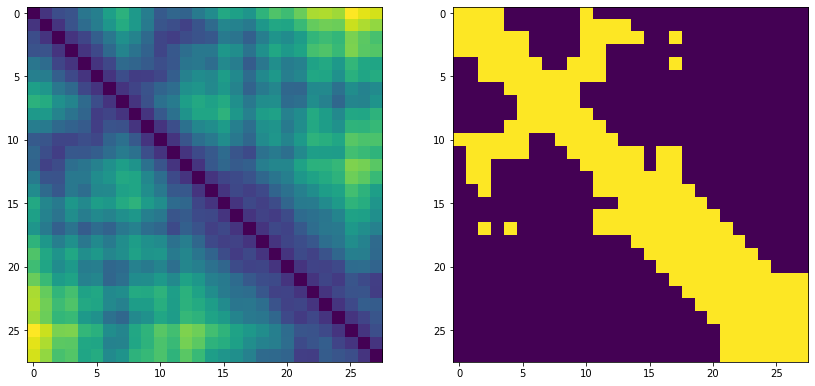

In [32]:
residues = struct[0].child_list[0].child_list
matr = np.zeros((len(residues), len(residues)))
# TODO: your code here
for i, r1 in enumerate(residues):
    for j, r2 in enumerate(residues[i+1:]):
        matr[i,i+1+j] = r1["CA"]-r2["CA"]
        matr[i+1+j,i] = r1["CA"]-r2["CA"]

R = 8

_, axs = plt.subplots(1,2,figsize=(14,7))
axs[0].imshow(matr)
axs[1].imshow(matr < R)
plt.show()

#### 2.3.2. Планарные углы

In [23]:
angle = pdb.calc_angle(cg.get_vector(), cb.get_vector(), ca.get_vector())
print('Угол CA-CB-CG равен {} ({} градусов)'.format(angle, angle/np.pi*180))

Угол CA-CB-CG равен 1.91095317719426 (109.48955190034646 градусов)


#### 2.3.3. Двугранные (торсионные) углы

In [24]:
chi1 = pdb.calc_dihedral(n.get_vector(), ca.get_vector(), cb.get_vector(), cg.get_vector())
print('Угол chi1 равен', chi1/np.pi*180, 'градусов')

Угол chi1 равен -144.32951156375964 градусов


#### Пример: построение карты Рамачандрана

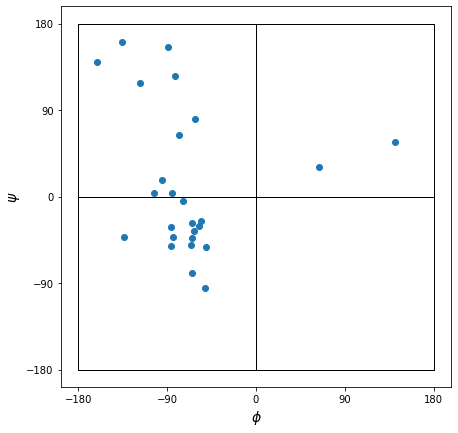

In [37]:
ang_pairs = np.empty((0,2))
for i in range(1, len(residues) - 1):
    phi = pdb.calc_dihedral(residues[i-1]["C"].get_vector(),
                            residues[i]["N"].get_vector(),
                            residues[i]["CA"].get_vector(),
                            residues[i]["C"].get_vector()
                           )
    psi = pdb.calc_dihedral(residues[i]["N"].get_vector(),
                            residues[i]["CA"].get_vector(),
                            residues[i]["C"].get_vector(),
                            residues[i+1]["N"].get_vector()
                           )
    ang_pairs = np.vstack((ang_pairs,np.array([phi,psi])/np.pi*180))

    
    pass

plt.figure(figsize=(7,7))
plt.scatter(*ang_pairs.T)
plt.plot([-180, -180, 180, 180, -180], [-180, 180, 180, -180, -180], c="black", linewidth=1)
plt.plot([0,0], [-180,180], c="black", linewidth=1)
plt.plot([-180,180], [0,0], c="black", linewidth=1)
plt.xticks(np.arange(-180, 181, 90))
plt.yticks(np.arange(-180, 181, 90))
plt.xlabel("$\phi$", fontsize=14)
plt.ylabel("$\psi$", fontsize=14)

plt.show()